## **Minutes of the Previous Meetings**
**First Evaluation:**
In First evaluation we collected the data from the kaggle which has 11 feature vectors. To choose the optimal number of clusters we plotted the homogenity score vs number of clusters and we observed there is no much change between 25 to 30 clusters. So we chose 27 to be the optimal number of clusters because in our data we have 27 genres. We were planning to do K-means clustering but sir suggested to take 2 more clustering methods and observe the accuracy among these three.


**Second Evaluation:**
We implemented all 3 clustering models and found that accuracy is more using K-means clustering than Fuzzy-c means and GMM. Accuracy that we got was 68%.


**Third Evaluation:**
For improving the accuracy we tried to remove the noisy features by dimensionality reduction so that we can get clusters more accurately. We used PCA for dimensionality reduction and we got 83% accuracy. 



#                                      Spotify Recommendation

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import csv
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Reading the data file ##
Here we are reading the data.csv file and storing this data in "values" 

In [ ]:
#Reading the contents of file 
data = pd.read_csv("SpotifyFeatures.csv")

#Taking the attributes(features) required from the above contents of the file 
features_names = ['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','popularity','speechiness','tempo']
values = data[features_names]

print("Shape of the list values: ", np.shape(values))
#changing the data type from DataFrame to numpy arrays
values=np.array(values)

#Printing the values before standardization
print(values)

Shape of the list values:  (232725, 11)
[[8.14000e-01 6.11000e-01 3.89000e-01 ... 0.00000e+00 5.25000e-02
  1.66969e+02]
 [8.16000e-01 2.46000e-01 5.90000e-01 ... 1.00000e+00 8.68000e-02
  1.74003e+02]
 [3.68000e-01 9.52000e-01 6.63000e-01 ... 3.00000e+00 3.62000e-02
  9.94880e+01]
 ...
 [8.13000e-01 9.01000e-01 5.17000e-01 ... 4.70000e+01 1.48000e-01
  8.41350e+01]
 [4.89000e-01 2.62000e-01 7.45000e-01 ... 4.40000e+01 1.46000e-01
  1.00031e+02]
 [4.79000e-01 9.73000e-02 7.58000e-01 ... 3.50000e+01 2.87000e-02
  1.13897e+02]]


### Normalizing the data
To perform clustering we are normalizing the data and storing the normalized vectors in "features"

In [ ]:
#Standardize the data values into a standard format
features = StandardScaler().fit_transform(values)

#Printing data after standardization
print(features.shape)
print(features)

(232725, 11)
[[ 1.38074423  0.6833763  -0.89093479 ... -2.26100656 -0.36796995
   1.5956073 ]
 [ 1.38843461 -0.34546718  0.19199369 ... -2.20603102 -0.18308213
   1.82325339]
 [-0.33421214  1.6445698   0.58529607 ... -2.09607995 -0.45583209
  -0.5883258 ]
 ...
 [ 1.37689903  1.50081358 -0.20130869 ...  0.32284371  0.14680516
  -1.08520529]
 [ 0.13105629 -0.30036719  1.02708778 ...  0.1579171   0.13602453
  -0.57075233]
 [ 0.09260435 -0.7646152   1.09712793 ... -0.33686274 -0.49625945
  -0.12199762]]


### Actual Labels
Assigning actual labels based on genre

In [ ]:
#Storing the actual labels in array genres
genres = data['genre']
#genres=np.array(genres)
print(type(genres))
distinct_genres = np.unique(genres)
print(genres)

#Storing all the actual distinct labels in an array
actual_lab = []
for i in range(len(features)):
  for j in range(len(distinct_genres)):
     if genres[i] == distinct_genres[j]:
       actual_lab.append(j)
       break
print(len(actual_lab))
print("Distinct labels we got in total are: ", len(distinct_genres))

<class 'pandas.core.series.Series'>
0         Movie
1         Movie
2         Movie
3         Movie
4         Movie
          ...  
232720     Soul
232721     Soul
232722     Soul
232723     Soul
232724     Soul
Name: genre, Length: 232725, dtype: object
232725
Distinct labels we got in total are:  27


# K-means Clustering

Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

We plotted the graph "Objective function vs k"

In [ ]:
#Implementation of KMeans Clustering
sse = {}
for k in range(1,10):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(features)
 #Finding the error and storing in a dictionary
 sse[k] = kmeans.inertia_
 

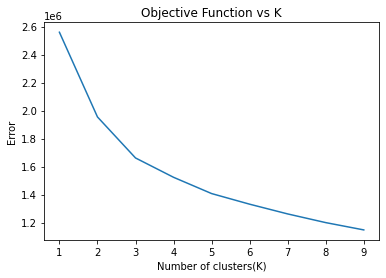

In [ ]:
#Plotting th error values against the number of clusters 
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Objective Function vs K")
plt.xlabel("Number of clusters(K)")
plt.ylabel("Error")
plt.show()

### 3-D Scatter Plot

Plotting the 3-D graph between 2 feature vectors and kmeans labels

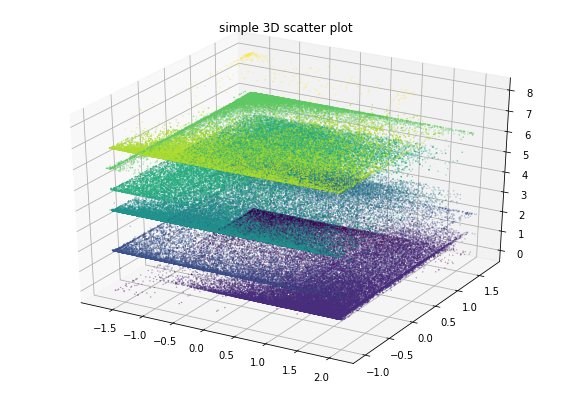

1
4


In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[:,0],features[:,1],kmeans.labels_,c=kmeans.labels_,s = 0.1)
plt.title("simple 3D scatter plot")
plt.show()
print(kmeans.labels_[1])
print(kmeans.labels_[17700])

### Computation of Homogeneity Score for Training data

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

In [ ]:
range_n_clusters = [x for x in range(25,30)]
homogeneity_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(features)
 cluster_labels = kmeans.predict(features)
 
 # homogeneity score
 homogeneity_avg.append(homogeneity_score(actual_lab, cluster_labels))

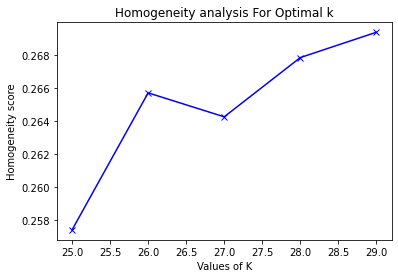

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range_n_clusters,homogeneity_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Homogeneity score') 
plt.title('Homogeneity analysis For Optimal k')
plt.show()

# Silhouette Analysis for optimal k

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
range_n_clusters = [26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(features)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(features, cluster_labels))

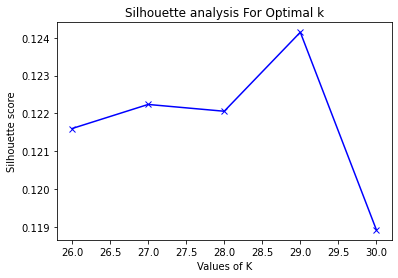

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# Testing for K-means

### Reading the test data file ##
Here we are reading the test.csv file and storing this data in "values1" 

In [ ]:
#Reading contents from the test files
data1 = pd.read_csv("test.csv")
features_names = ['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','popularity','speechiness','tempo']
values1 = data1[features_names]

values=np.array(values1)
print(type(values1))
print(values1)
print(np.shape(values1))

<class 'pandas.core.frame.DataFrame'>
     valence  acousticness  danceability  duration_ms  energy  \
0      0.814        0.6110         0.389        99373   0.910   
1      0.816        0.2460         0.590       137373   0.737   
2      0.368        0.9520         0.663       170267   0.131   
3      0.227        0.7030         0.240       152427   0.326   
4      0.390        0.9500         0.331        82625   0.225   
..       ...           ...           ...          ...     ...   
196    0.725        0.0253         0.598       202661   0.496   
197    0.661        0.0983         0.596       216689   0.557   
198    0.864        0.0431         0.853       220173   0.663   
199    0.828        0.0234         0.876       232000   0.710   
200    0.755        0.0230         0.689       210573   0.791   

     instrumentalness  liveness  loudness  popularity  speechiness    tempo  
0            0.000000    0.3460    -1.828           0       0.0525  166.969  
1            0.000000    

### Normalizing the data
To perform clustering we are normalizing the data and storing the normalized vectors in "test_features"

In [ ]:
test_features = StandardScaler().fit_transform(values1)
print(test_features[17])
print(test_features.shape)

[ 1.63056602 -0.11188928  0.93157488 -0.20574377  2.16499172 -0.28838024
  1.76915557  1.10784262 -0.64122122 -0.53507588  0.52697079]
(201, 11)


### Actual Labels
Assigning actual labels based on genre

In [ ]:
genres = data1['genre']
print(genres)
test_actual_lab = []
abc=[]
for i in range(len(test_features)):
  for j in range(len(distinct_genres)):
     if genres[i] == distinct_genres[j]:
       test_actual_lab.append(j)
       break
     if(genres[i] not in abc):
       abc.append(genres[i])
print("Total values in test data: ",len(test_actual_lab))

0      Movie
1      Movie
2      Movie
3      Movie
4      Movie
       ...  
196      R&B
197      R&B
198      R&B
199      R&B
200      R&B
Name: genre, Length: 201, dtype: object
Total values in test data:  201


### Computation of Homogeneity Score for Testing data

**Without Dimensionality Reduction:**

In [ ]:
homogeneity_avg = []
num_clusters = 27
 # initialise kmeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)

cluster_labels = kmeans.predict(test_features)
 

 # homogeneity score
print(homogeneity_score(test_actual_lab, cluster_labels))

0.7113145814171257


**Reducing the dimensions to 4:**

In [ ]:
#Dimensionality Reduction
principal=PCA(n_components=4)
principal.fit(features)
features=principal.transform(features)

In [ ]:
#Printing variances along the 4 axis that we have taken
print(principal.explained_variance_ratio_)

[0.3282235  0.15545747 0.10647707 0.09089407]


**After Dimensionality Reduction:**

In [ ]:
homogeneity_avg = []
num_clusters = 27
 # initialise kmeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(features)
principal.fit(test_features)
test_features=principal.transform(test_features)
cluster_labels = kmeans.predict(test_features)
 

 # homogeneity score after dimensionality reduction
print(homogeneity_score(test_actual_lab, cluster_labels))

0.8370003637091075


In [ ]:
#Printing the cluster labels for the user songs(test data) to which they belong
print(cluster_labels)

[13 13 26 22  1 26  8 26  0 13 10 10 23 19 10  6  8 13 23 13 26  5  5  5
 11  8  0  5 19 21 13  8 19 19 14 19  0 22 10  5 19 17  1  5 21 19  0  0
  5 19 26 11  6 22  8 15 24  8 10 13  1 19  1 19  5 13  5 22  5  5 19 26
  1 26  8 22 22  1  8  8 14  5  8 10 21 23  5 26 19 23 21  5 11  8 14  4
  6 14 10 11  5 19  1 26  5  5  1 26  1 22 11 13 26  1  6  5  0 10  4  8
  8  8 19 23 22 19 19 14 17 19 10 22 10 15 23 20 16  9  9 16  4 20  4 20
  0  7 20 16 20  7 21 21 20 26  7  9  9 16  4 16  0 16 16  9  7 20 16 20
  9  7 20 20  7  7 20  3 16  7  0 16 16 16 16 20 20 13 20  4 16  4 16  4
  7  9 20 16 16 16 16 16 16]


In [ ]:
#Counting the occurences of the cluster numbers of the user data(test data)
cluster_labels1=list(cluster_labels)
count_list=[]
for i in range(27):
  count_list.append(cluster_labels1.count(i))
print(count_list)

[9, 10, 0, 1, 8, 18, 4, 9, 14, 7, 10, 5, 0, 10, 5, 2, 21, 2, 0, 17, 15, 6, 9, 6, 1, 0, 12]


In [ ]:
#Storing the top 5 most occured cluster numbers
Count = []
for x in sorted(count_list)[-5:]:
 if count_list.index(x) not in Count:
  Count.append(count_list.index(x))
print("Most occurred clusters are: ", Count)

Most occurred clusters are:  [8, 20, 19, 5, 16]


In [ ]:
#Storing the genres of the top 5 clusters 
recommendations = []
required_genres=[]
for i in range(len(Count)):
  required_genres.append(distinct_genres[Count[i]])

In [ ]:
values2=data[['genre','popularity','track_name']]
data1=np.array(values2)
data1=list(data1)
print(len(data1))

232725


In [ ]:
#Storing the popularity values and the corresponding index of the top 5 genres in two seperate 2-D lists
popularity_values=[[]*1]*len(required_genres)
index_values=[[]*1]*len(required_genres)
for i in range(len(required_genres)):
  var=0
  for j in range(len(data1)):
    if required_genres[i]==data1[j][0]:
      popularity_values[i].append((data1[j][1]))
      index_values[i].append((j))

In [ ]:
#Storing top 5 popularities for all top 5 genres in a list
all_max_popularity=[]
for j in range(len(required_genres)):
  max_popularity=[]
  for i in range(5):
    ind=popularity_values[j].index(max(popularity_values[j]))
    max_popularity.append(ind)
    popularity_values[j][ind]=-1
  all_max_popularity.append(max_popularity)

In [ ]:
#Storing the final indices 
all_final_index=[]
for j in range(len(required_genres)):
  final_index=[]
  for i in range(len(all_max_popularity[j])):
    final_index.append(index_values[j][all_max_popularity[j][i]])
  all_final_index.append(final_index)

In [ ]:
print(all_final_index)

[[86951, 86953, 86952, 86955, 86954], [86956, 86957, 86961, 86965, 86958], [86963, 86967, 86970, 86960, 86962], [86966, 86968, 86969, 86973, 86974], [86979, 86984, 86997, 87025, 86959]]


In [ ]:
#Recommending top 25(most popular) songs with the help of final indices that we have stored
var=1
print("Recommendations: ")
for j in range(len(all_final_index)):
  for i in range(len(all_final_index[j])):
    print(f"{var}.{data1[all_final_index[j][i]][2]}")
    var+=1

Recommendations: 
1.Wow.
2.Sunflower - Spider-Man: Into the Spider-Verse
3.MIDDLE CHILD
4.Going Bad (feat. Drake)
5.SICKO MODE
6.Thotiana
7.a lot
8.ZEZE (feat. Travis Scott & Offset)
9.Better Now
10.Drip Too Hard (Lil Baby & Gunna)
11.Lucid Dreams
12.Mo Bamba
13.SAD!
14.Robbery
15.Swervin (feat. 6ix9ine)
16.Pure Water (with Migos)
17.Please Me
18.Look Back At It
19.rockstar (feat. 21 Savage)
20.Moonlight
21.I Like It
22.Jocelyn Flores
23.Taste (feat. Offset)
24.Arms Around You (feat. Maluma & Swae Lee)
25.Money


# Fuzzy C-means Clustering

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


### Cluster Assignment

In [ ]:
from fcmeans import FCM
my_model = FCM(n_clusters=3)
my_model.fit(features)

### 3-D Scatter Plot

Plotting the 3-D graph between 2 feature vectors and labels

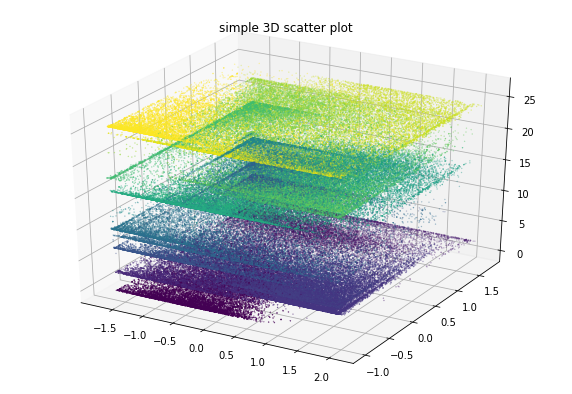

25
7


In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[:,0],features[:,1],kmeans.labels_,c=kmeans.labels_,s = 0.1)
plt.title("simple 3D scatter plot")
plt.show()
print(kmeans.labels_[1])
print(kmeans.labels_[17700])

### Computation of Homogeneity Score

In [ ]:
homogeneity_avg = []
num_clusters = 27
 # initialise kmeans
my_modle = FCM(n_clusters=num_clusters)
my_modle.fit(features)
cluster_labels = my_modle.predict(test_features)
 
 
 # homogeneity score
print(homogeneity_score(test_actual_lab, cluster_labels))

0.2283961288203805


# GMM

### Cluster Assignment

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
X = np.array(features)
gm = GaussianMixture(n_components=27, random_state=0).fit(X)
cluster_labels = gm.predict(features)

### 3-D Scatter Plot
Plotting the 3-D graph between 2 feature vectors and labels

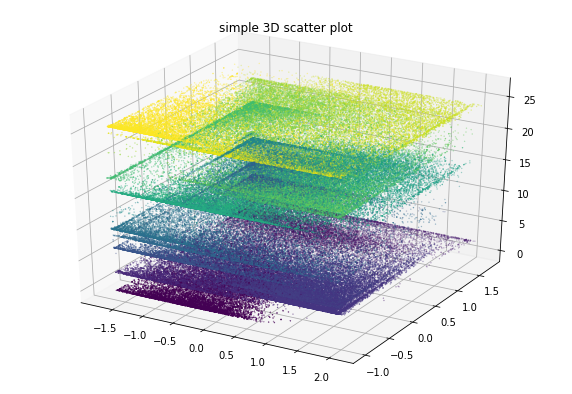

25
7


In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(features[:,0],features[:,1],kmeans.labels_,c=kmeans.labels_,s = 0.1)
plt.title("simple 3D scatter plot")
plt.show()
print(kmeans.labels_[1])
print(kmeans.labels_[17700])

### Computation of Homogeneity Score

In [ ]:
homogeneity_avg = []
num_clusters = 27
 # initialise kmeans
gm = GaussianMixture(n_components=27, random_state=0).fit(X)
cluster_labels = gm.predict(test_features)
 
 
 # homogeneity score
print(homogeneity_score(test_actual_lab, cluster_labels))

0.10511796171758375
